# Objectives
1. Clustering for dataset exploration
    - Unserpervised learning: Clustering
    - Evaluating the quality of Clustering 
    - Transforming features for better clusterings
2. Visualization with hierarchical clustering and t-SNE
    - Visualizing hierarchies
    - Cluster labels at any intermediate in hierarchical clustering
    - t-SNE for 2-dimensional maps
3. Decorrelating your data and dimension reduction technique
    - Decorrelating with Principal Component Analysis(PCA)
    - Intrisic dimension
    - Dimension reduction with PCA
4. Discovering interpretable features
    - Non-negative matrix factorization (NMF): another dimension deduction technique
    - NMF learns interpretable parts
    - Building recommender systems using NMF

## 1. Clustering for dataset exploration
- Unserpervised learning: Clustering
- Evaluating the quality of Clustering 
- Transforming features for better clusterings

### 1.1 Unserpervised learning finds patterns in data 
- k-means clustering
 - Number of clusters must be specified 
- scikit-learn: Kmeans
- Cluster labels for new samples 
 - New samples can be assigned to existing clusters
 - k-means remembers the mean of each cluster (the 'centroids')
 - Finds the nearest centroid to each new sample 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('/QXJ/kaggle/data/iris.csv')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


- 2D NumPy array 
- columns are measurements - the features = dimensions 
- rows represents iris plants - the samples 

In [3]:
iris.isna().sum().sort_values()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

**k-means clustering**

In [147]:
samples = iris.drop('species',axis = 1).sample(frac= 0.7, random_state = 12)
samples = np.array(samples)
samples[:5]

array([[5. , 3.5, 1.3, 0.3],
       [6.3, 2.5, 5. , 1.9],
       [4.4, 3. , 1.3, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [6.8, 3.2, 5.9, 2.3]])

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(samples)

KMeans(n_clusters=3)

In [14]:
labels = model.predict(samples)
print(labels)

[0 1 0 1 2 2 2 0 2 0 1 0 0 0 2 2 2 1 0 1 0 1 1 1 0 2 2 1 0 0 0 1 2 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 2 1 0 2 1 1 2 0 1 0 2 1 1 1 1 1 1 1 2 0 2 2
 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 1 1 0 2 2 1 1 1]


In [18]:
# Cluster labels for new samples
new_samples = iris.drop('species', axis = 1).sample(frac= 0.2, random_state = 12).to_numpy()
new_samples[:5]

array([[5. , 3.5, 1.3, 0.3],
       [6.3, 2.5, 5. , 1.9],
       [4.4, 3. , 1.3, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [6.8, 3.2, 5.9, 2.3]])

In [19]:
new_labels = model.predict(new_samples)
print(new_labels)

[0 1 0 1 2 2 2 0 2 0 1 0 0 0 2 2 2 1 0 1 0 1 1 1 0 2 2 1 0 0]


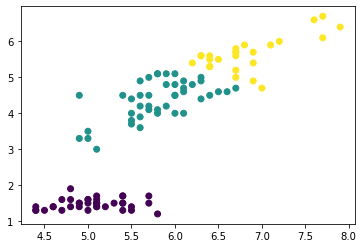

In [24]:
# sepal vs petal length
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs,ys, c=labels)
plt.show()

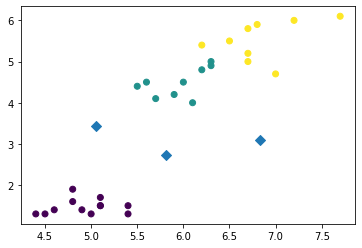

In [23]:
xs = new_samples[:,0]
ys = new_samples[:,2]
plt.scatter(xs,ys, c= new_labels)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker = 'D', s = 50)
plt.show()

### 1.2 Evaluating a clustering 
- Direct approach: compare the clustering to the correspondence iris species 
- Next: measure quality of a clustering does not require samples to pre-grouped -> this approach helps to make a choice of numbers of clustering beforehand 


**Approach I: Do the clusters correspond to the sepcies?**
*-> Using cross tabulation*

In [83]:
cluster = iris['species'].sample(frac= 0.7, random_state = 12)
cluster = pd.DataFrame(cluster, columns = {'species'})
cluster['labels'] = labels
cluster.set_index('labels')
cluster['count'] = 1

In [88]:
cluster.pivot_table(index='labels',columns = 'species', values='count', aggfunc={'sum'},fill_value = 0)

sum                     
species setosa versicolor virginica
labels                             
0           37          0         0
1            0         33        10
2            0          3        22

**cluster 0 is perfectly matching**

In [90]:
ct = pd.crosstab(cluster['labels'], cluster['species'])
ct

species,setosa,versicolor,virginica
labels,,,
0,37,0,0
1,0,33,10
2,0,3,22


**Approach II: measuring clustering quality**
*-> Use only samples and their cluster labels*
<br>
*-> Measure how spread out the cllusters ar (lower is better): distane from each sample to its centroid*
>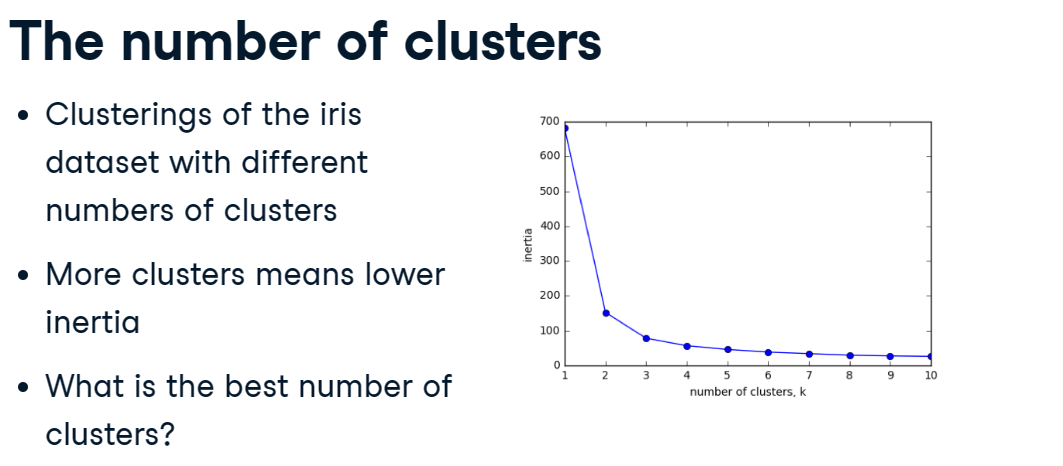
**"elbow": A good clustering has tight clusters but not too many**

In [91]:
print(model.inertia_)

54.87470069138906


### 1.3 Transforming features for better clusterings
- Problem with the dataset: bigger variance of features effect the Clustering result
- Solution: **StandardScaler**
 - First, StandardScaler(): Use fit()/ transform() with StandardScaler
 - Second, KMeans: Use fit()/predict() with KMeans
- **Pipeline**
 - Create objects: StandardScaler() and KMeans() 
 - Apply make_pipeline to the steps
 - Fit sampls to pipeline, thus to the steps
 - Predict method to return the labels
 - Finally, create cross tabular
- The other preprocessing mothods
 - **MaxAbsScaler**
 - **Normalizer**

In [96]:
from sklearn.preprocessing import StandardScaler

# create an StandardScaler object
scaler = StandardScaler()

# fit it to the samles
scaler.fit(samples)
StandardScaler(copy =True, with_mean = True, with_std = True)

# transform method can be used to standarize any sample
samples_scaled = scaler.transform(samples)
print(samples_scaled[:5])

[[-0.98966032  0.96181596 -1.35852226 -1.14959365]
 [ 0.65175686 -1.26755878  0.77739801  0.96113568]
 [-1.74723748 -0.15287141 -1.35852226 -1.28151423]
 [-0.1058203  -0.59874636  0.25784983  0.16961218]
 [ 1.28307116  0.29300354  1.29694618  1.48881801]]


**Use pipeline**
*Use make_pipeline() and Pipeline()*

In [100]:
# Create objects: StandardScaler() and KMeans() 
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)

from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)

# fit sampls to pipeline, thus to the steps
pipeline.fit(samples)

# Use predict method to return the labels
labels = pipeline.predict(samples)
labels[:5]

array([1, 2, 1, 2, 0])

In [103]:
# Create objects: StandardScaler() and KMeans() by steps
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters = 3))]


# fit sampls to pipeline object, thus fitting the models 
pipeline = Pipeline(steps)
pipeline.fit(samples)

# Use predict method to return the labels
labels = pipeline.predict(samples)
labels[:5]

array([1, 0, 1, 0, 2])

In [108]:
# create cross tabular 
species = iris['species'].sample(frac= 0.7, random_state = 12)
df = pd.DataFrame({'labels':labels, 'species':species})
ct = pd.crosstab(df['labels'], df['species'])
ct

species,setosa,versicolor,virginica
labels,,,
0,0,27,5
1,37,0,0
2,0,9,27


**Without StandardScaler**
>>> 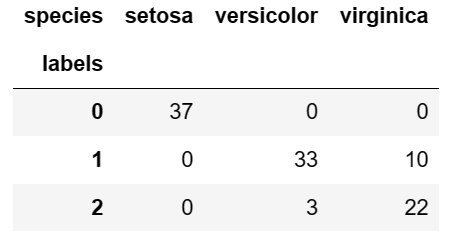

## 2. Visualization with hierarchical clustering and t-SNE
*Two techniques of unsupervised learning visualization*
- Visualizing hierarchies
- Cluster labels at any intermediate in hierarchical clustering
- t-SNE for 2-dimensional maps

### 2.1 Visualizing hierarchies
- Hierarchies: 
 - Groups of living things can form a hierarchy
 - Clusters are contanied in one another 
- Visualization:
 - **agglomerative** hierarchical clusering
     - every countriy is its own cluster
     - at each step, the two closest clusters are merged
     - countinue untill all countries in a single cluster
 - **divisive** hierarchical clustering
- **dendrogram**: agglomerative hierarchical clustering
 - Read from the bottom up
 - Vertical lines represent clusters
- Scipy: given samples (the array of scores) and country name

In [110]:
euroversion = pd.read_csv('/QXJ/kaggle/data/Eurovision_televotes_2021.csv')
print(euroversion.shape)
euroversion.head(3)

(39, 27)


,"Country (Voters (vertical), Finalists (horizontal))",Albania,Azerbaijan,Belgium,Bulgaria,Cyprus,Finland,France,Germany,Greece,...,Norway,Portugal,Russia,San Marino,Serbia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
0,Israel,0,2,0,0,0,4,8,0,0,...,0,0,10,0,0,0,0,6,12,0
1,Poland,0,0,0,0,0,6,5,0,0,...,3,0,2,0,0,0,1,7,12,0
2,San Marino,0,0,0,2,8,4,10,0,7,...,0,0,1,0,0,0,0,3,5,0


In [124]:
scores = euroversion.iloc[:,1:].to_numpy()
country_names = euroversion.iloc[:,0].to_numpy()
print(scores[:2])
print(country_names[:2])

[[ 0  2  0  0  0  4  8  0  0  1  0  7  3  5  0  0  0  0 10  0  0  0  0  6
  12  0]
 [ 0  0  0  0  0  6  5  0  0  8  0 10  4  0  0  0  3  0  2  0  0  0  1  7
  12  0]]
['Israel' 'Poland']


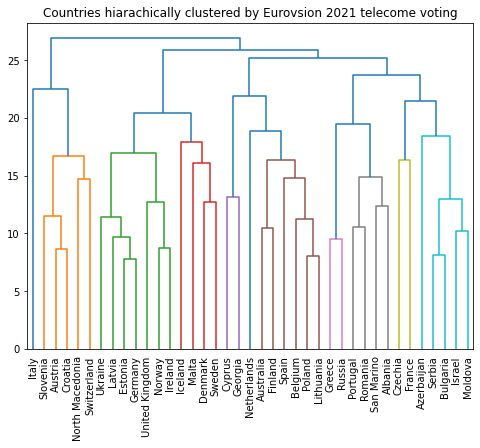

In [134]:
from scipy.cluster.hierarchy import linkage, dendrogram

# linkag() performs the hierarchy clustering
mergings = linkage(scores, method = 'complete')

plt.figure(figsize=(8, 6))
plt.title('Countries hiarachically clustered by Eurovsion 2021 telecome voting')
# pass the output of linkage to the dendrogram() speicfying the list of country names as the label parameters
dendrogram(mergings,
          labels = country_names, 
          leaf_rotation = 90, 
          leaf_font_size = 10)
plt.show()

### 2.2 Cluster labels at any intermediate in hierarchical clustering
- Intermediate clustering at any height of dendrogram 
 - **Height on dendrogram** = distrance between merging clusters
 - Height on dendrogram specifies max. distance between merging clusters
 - Stop merging when every cluster is far apart
>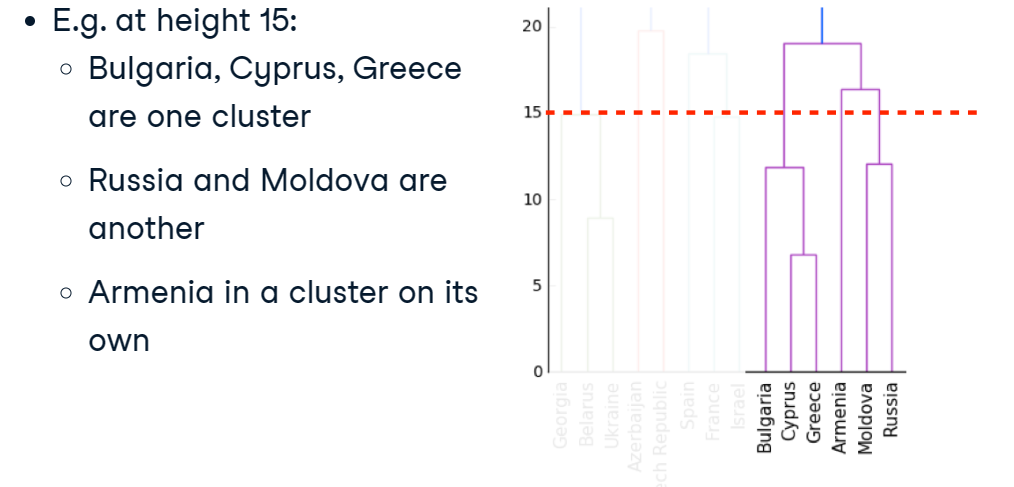

- Distance between clusters are measured by **linkage methods**
- Exctract labels using **fcluster()** returns a Numpy array of cluster labels
> 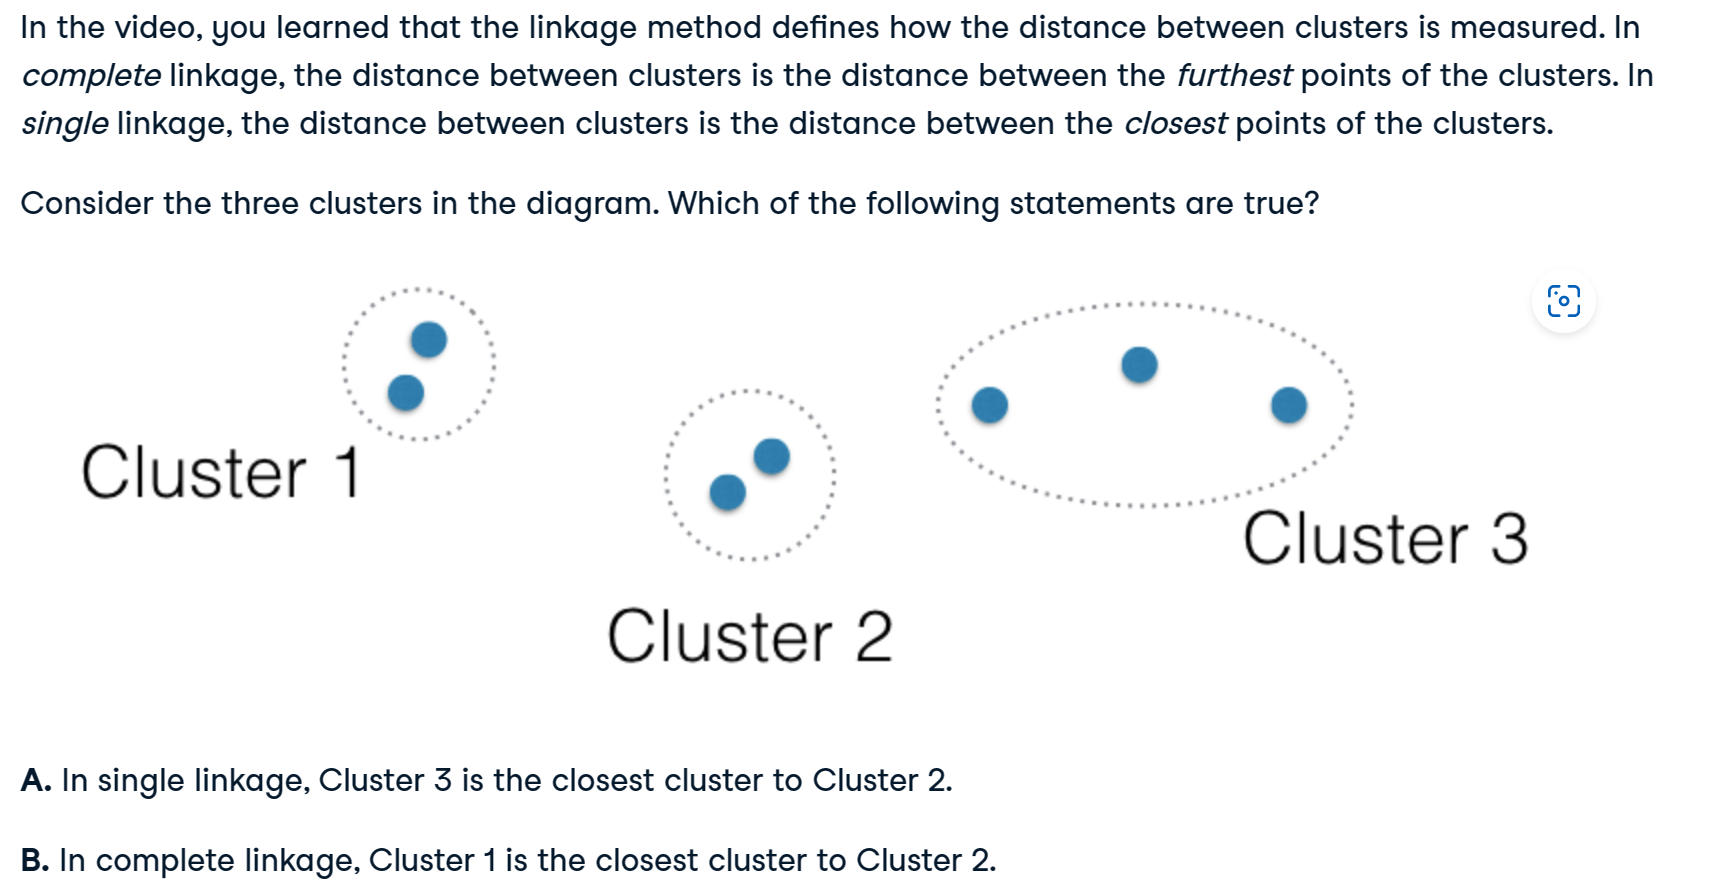

In [135]:
from scipy.cluster.hierarchy import linkage
mergings = linkage(scores, method= 'complete')

from scipy.cluster.hierarchy import fcluster
# height = 15
labels = fcluster(mergings, 15, criterion = 'distance')

print(labels)

[17 11 14 14  7  4  2 18  5 11  1  5  3  1 13  4  5 17 17 17  9 11  4 10
 10 14  4  8 14  1 15  9 11  6 13 16  6  2 12]


In [138]:
# inspect the cluster labels 
pairs = pd.DataFrame({'labels':labels, 'countries':country_names})
print(pairs.sort_values('labels'))
# scipy label starts from 1, not as index starting from 0

    labels        countries
29       1          Croatia
13       1         Slovenia
10       1          Austria
37       2      Switzerland
6        2  North Macedonia
12       3            Italy
26       4          Ukraine
22       4          Germany
5        4          Estonia
15       4           Latvia
16       5          Ireland
8        5           Norway
11       5   United Kingdom
33       6          Denmark
36       6           Sweden
4        7            Malta
27       8          Iceland
31       9          Georgia
20       9           Cyprus
23      10        Australia
24      10          Finland
32      11        Lithuania
1       11           Poland
21      11          Belgium
9       11            Spain
38      12      Netherlands
34      13           Russia
14      13           Greece
2       14       San Marino
3       14          Albania
28      14          Romania
25      14         Portugal
30      15          Czechia
35      16           France
0       17          

### 2.3 t-SNE for 2-dimensional maps
**t-SNE** = t-distributed stochastic neighbor embedding
 - map samples to 2D or 3D space
 - map approximately preserves nearness of samples
 - great for inspecting dataset 
- t-SNE maps somples to 2D space
 - did not know there were different species
 - cannot extend the map to include new data sample
 - axes has no any interpretation meaning, it is different every time even with the same dataset

In [172]:
# confirm the dataset 
samples = iris.drop('species', axis = 1).to_numpy()
species = iris['species'].to_numpy()
print(samples[:2])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]


C:\Users\QXJ\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


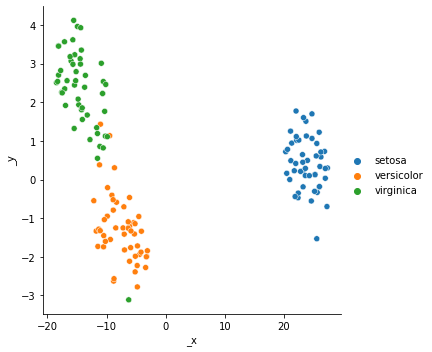

In [165]:
# import t-SNE and create a t-SNE object
from sklearn.manifold import TSNE
# normally try from 50 to 100: best to make them bunch tegether 
model = TSNE(learning_rate = 100)

# apply fit_transform method and plot a scatterplot
# fits the data and transforms the data
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
sns.relplot(x = xs, y = ys, hue = species)
plt.show()

C:\Users\QXJ\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


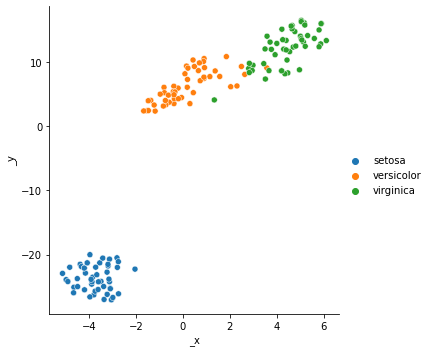

In [168]:
# import t-SNE and create a t-SNE object
from sklearn.manifold import TSNE
# normally try from 50 to 100
model = TSNE(learning_rate = 50)

# apply fit_transform method and plot a scatterplot
# fits the data and transforms the data
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
sns.relplot(x = xs, y = ys, hue = species)
plt.show()

colors = {'setosa':'blue', 'versicolor':'purple', 'virginica':'green'}
colors = pd.DataFrame(colors)
colors

## 3. Decorrelating your data and dimension reduction
- Decorrelating with Principal Component Analysis(PCA)
- Intrisic dimension
- Dimension reduction with PCA

### 3.1 Decorrelating your data and dimension reduction
- **Dimension reduction**: finds patterns in data and uses the patterns to re-express it in a compressed form
 - **remove less-informative ""noise"" features""
- **Principal Component Analysis(PCA)** (fundemental) -> **Principal Compoment** = direction of variance
 - decorrelation: 
 - **reduces dimension**:
- **decorrelation**
 - Rotates data samples to be aligned with axes
 - shifts data samples so they have mean 0
 - PCA.fit() method learns the transformation from given data
 - PCA.transform() method applies the learned transformation, can be applied to new data
 - Features of dataset are often correlated -> after transforming, resulting PCA features are not linearly correlated, called decorrelation
 > 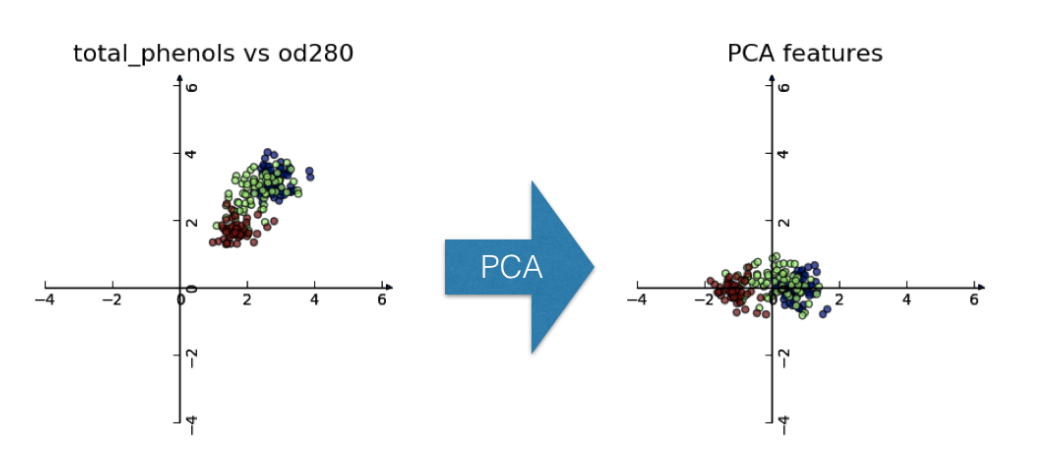
 - Pearson correlation can measure linear correlation of features
 > 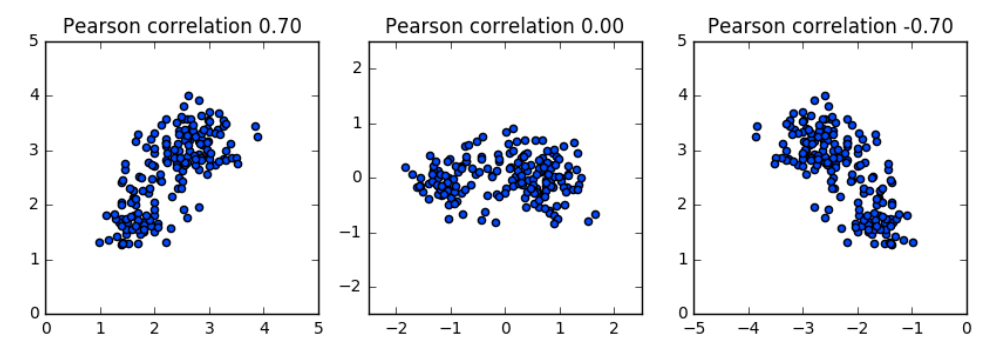
 - PCA aligns principal components with the axes
  - **model.components_**: each defines displacement from mean
 > 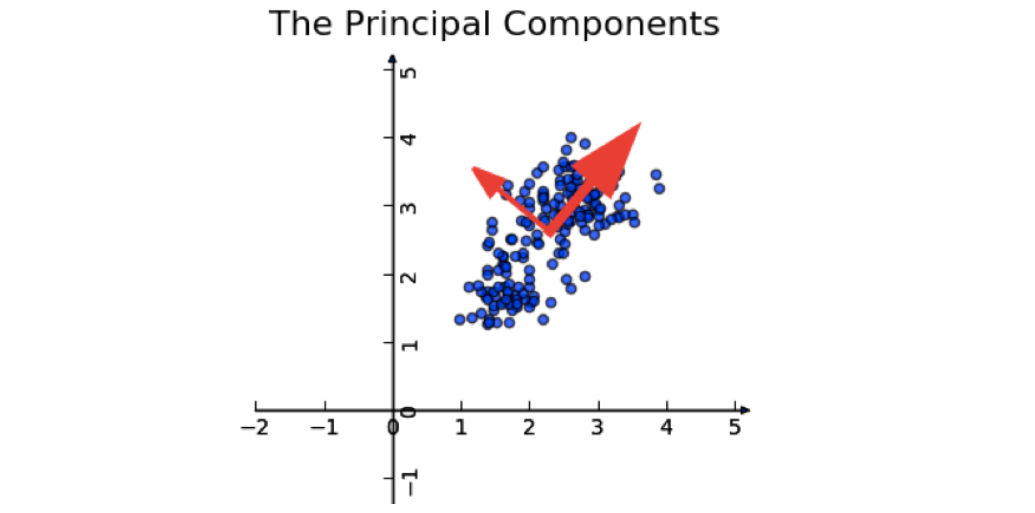
  - Both plot 1 and 3 are pricipal components 
 > 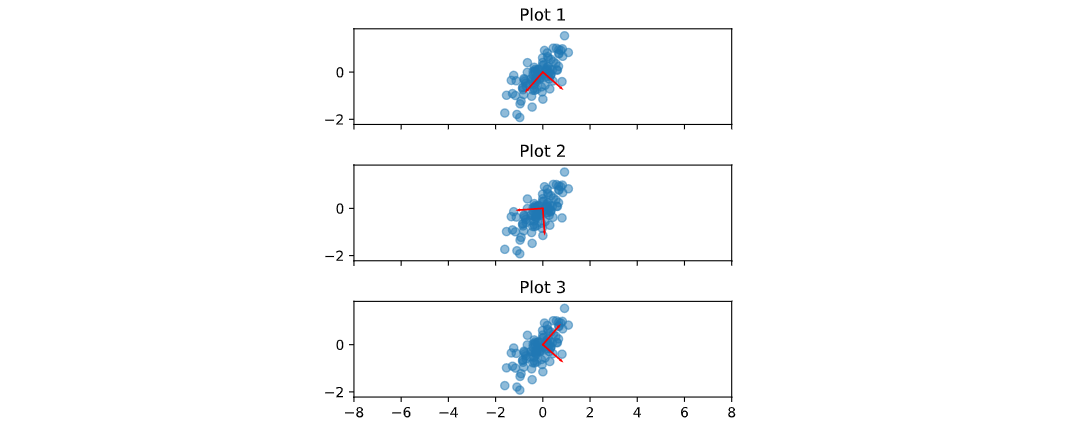

In [173]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)

PCA()

In [174]:
# transform the samples 
# rows of transformed correspond to samples 
# columns of transformed are the 'PCA features
# row gives PCA feature values of corresponding sample
tranformed = model.transform(samples)
transformed[:2]

array([[ -3.4819956, -24.191113 ],
       [ -4.3700976, -21.521818 ]], dtype=float32)

### 3.2 Intrisic dimension
- **intrinsic dimension** = number of features needed to approximate the dataset -> compress the features to the essential ones 
> 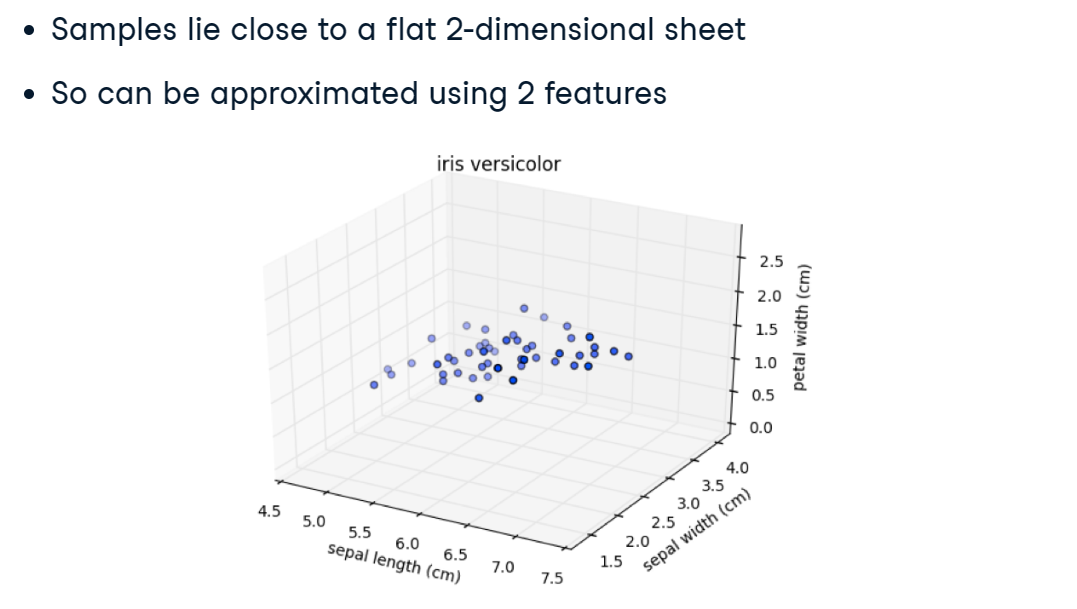
*Sample lie close to a flat 2-dimentional sheet -> using 2 features*

- PCA to identify intrinsic dimension when samples have too many features
 - intrinsic dimension = number of PCA features with siginificant variance
 > *The last bar shows less variance which can be passed*
  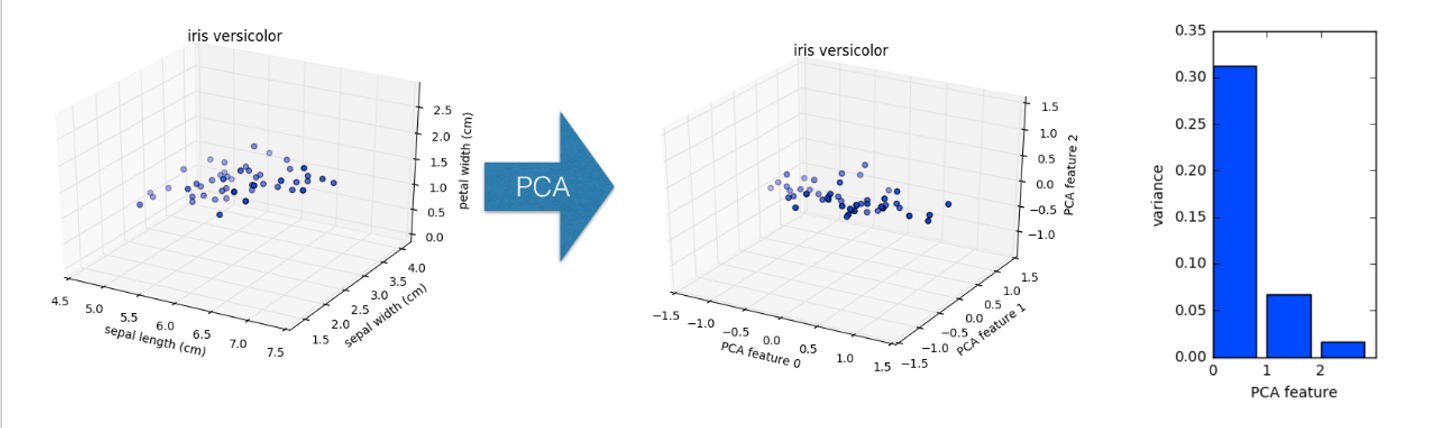

In [175]:
# import PCA and fit the model
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(samples)

PCA()

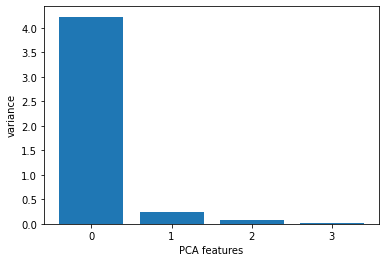

In [177]:
# create a range enumerating the PCA features
features = range(pca.n_components_)
# plt bar 
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA features')
plt.show()

### 3.3 Dimension reduction with PCA: same data, less features
- Dimension reduction with PCA
 - Discards low variance PCA features
 - Assumes the high variance features are informative
- Assumption not held, using alternative: word frequency arrays
 - "Sparse": most entries are 0
 - Use special array - scipy.sparse.csr_matrix - instead of Numpy
 - csr_matrix only remebers non-zero entries
 - not PCA, but TruncatedSVD

In [179]:
# import PCA
from sklearn.decomposition import PCA

# create PCA model and specify components
pca = PCA(n_components = 2)
# fit the model 
pca.fit(samples)
# transform the model 
transformed = pca.transform(samples)
print(transformed.shape)

(150, 2)


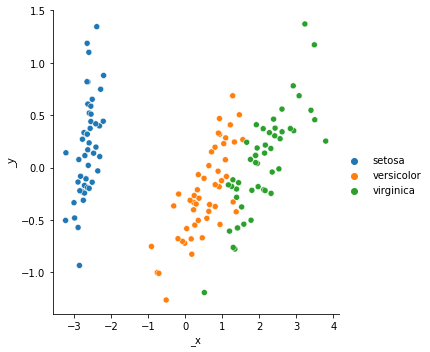

In [182]:
# dataset in 2 dimensions 
xs = transformed[:,0]
ys = transformed[:,1]
sns.relplot(x=xs, y=ys, hue = species)
plt.show()

In [ ]:
# TruncatedSVD and csr_maatrix example
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components = 3)
model.fit(documents) # documents is csr_matrix
transformed = model.transform(documents)

In [ ]:
# A tf-idf word-frequency array
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

In [ ]:
<script.py> output:
    [[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
     [0.         0.         0.51785612 0.         0.51785612 0.68091856]
     [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
    ['cats', 'chase', 'dogs', 'meow', 'say', 'woof']

In [ ]:
# Clustering Wikipedia part I
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline = pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

In [ ]:
    label                                        article
59      0                                    Adam Levine
57      0                          Red Hot Chili Peppers
56      0                                       Skrillex
55      0                                  Black Sabbath
54      0                                 Arctic Monkeys
... 

## 4. Discovering interpretable features
- Non-negative matrix factorization (NMF): another dimension deduction technique
- NMF learns interpretable parts
- Building recommender systems using NMF

### 4.1 Non-negative matrix factorization (NMF): another dimension deduction technique
- NMF models are interpretable(unlike PCA)
- All sample features must be **non-negative(>=0)**
- NMF expresses documents as combinations of topic(or "theme")
 > 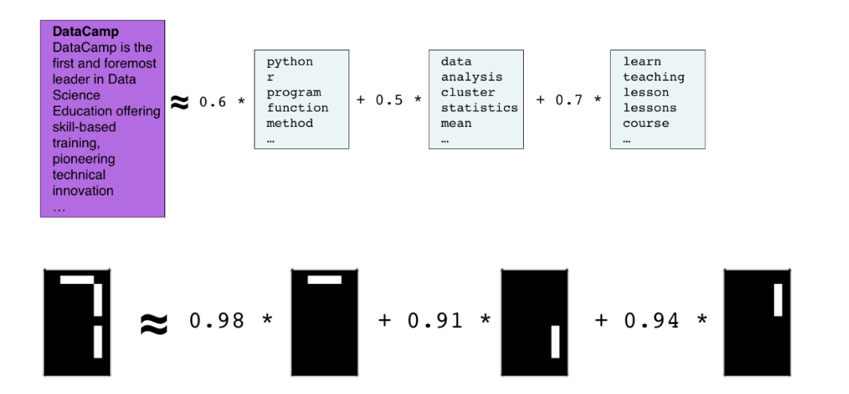
- Follows fit()/transform() pattern but must specify number of compnents, such as NMF(n_components = 2) 
- Works with Numpy array and sparse array - csr_matrix
- Application
 - word frequencie in each document 
 - images encoded as arrays
 - audio specitrograms
 - purchase histories on e-commerce sites

**word-frequency array**

In [192]:
# create dataset
columns = ['course', 'datacamp', 'potato', 'the' ]
doc = pd.DataFrame({
    'course': [ 0.2, 0.0, 0.3, 0.2, 0.4, 0.5, 0.0, 0.4, 0.6, 0.2, 0.2, 0.3],
    'datacamp': [ 0.3, 0.2, 0.1, 0.2, 0.5, 0.2, 0.2, 0.1, 0.5, 0.1, 0.3, 0.6],
    'potato': [ 0.4, 0.1, 0.2, 0.2, 0.0, 0.6, 0.1, 0.3, 0.4, 0.1, 0.3, 0.3],
    'the': [ 0.5, 0.3, 0.6, 0.4, 0.5, 0.3, 0.3, 0.2, 0.5, 0.5, 0.6, 0.8]
})
doc['df'] = np.arange(1,13)
doc.head(2)

,course,datacamp,potato,the,df
0,0.2,0.3,0.4,0.5,1
1,0.0,0.2,0.1,0.3,2


- measure presence of words in each document using 'tf-idf'
 - **'tf'** = frequency of word in document 
 - **'idf'** reduces influence of frequent words

In [193]:
# create samples array
words = doc.drop('df', axis = 1).to_numpy()

In [194]:
from sklearn.decomposition import NMF

# create model 
model = NMF(n_components = 2)

# fit the model and transformation
model.fit(words)

C:\Users\QXJ\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=2)

In [196]:
nmf_features = model.transform(words)

# print out components 
# same dimension as the samples 
print(model.components_)

[[0.25572805 0.72857328 0.14812498 1.18486194]
 [0.77601191 0.04307392 0.80316374 0.        ]]


In [197]:
# print the features: 2 new features
# the features and components can be combined to reconstruct the original data sample
print(nmf_features)

[[0.40773174 0.27793412]
 [0.25517892 0.        ]
 [0.40477544 0.20539101]
 [0.31685242 0.17126597]
 [0.50207328 0.1255434 ]
 [0.24555002 0.634743  ]
 [0.25517892 0.        ]
 [0.15659866 0.40111363]
 [0.49030472 0.51027187]
 [0.34514119 0.09562014]
 [0.47325027 0.19534075]
 [0.71009232 0.20167565]]


**Reconstruct of a sample by using a product of matrices**
> 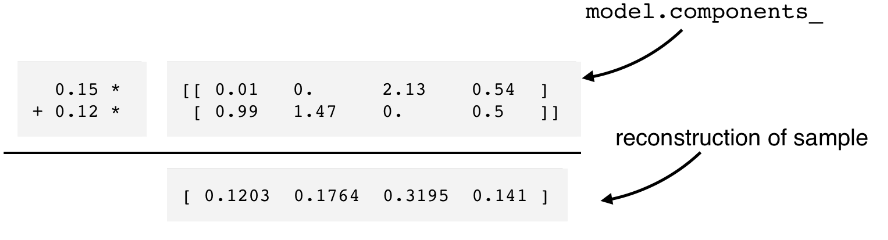
*This is the "Matrix Factoization" in NMF*

In [199]:
# reconstruct of a sample
print(words[2,:])

[0.3 0.1 0.2 0.6]


In [200]:
print(nmf_features[2,:])

[0.40477544 0.20539101]


### 4.2 NMF learns interpretable parts
- components of NMF represent patterns that frequently occur in the samples 
- for documents: 
 - NMF components represent topics
 - NMF features combine topic into documents
- for images, NMF components are parts of images
 - patterns frequently occur in the images
 - Grayscale: no colors only shades of gray
  - measure pixel brightness
  - represent with value between 0 and 1(0 is black)
  - convert to 2D array 
  > 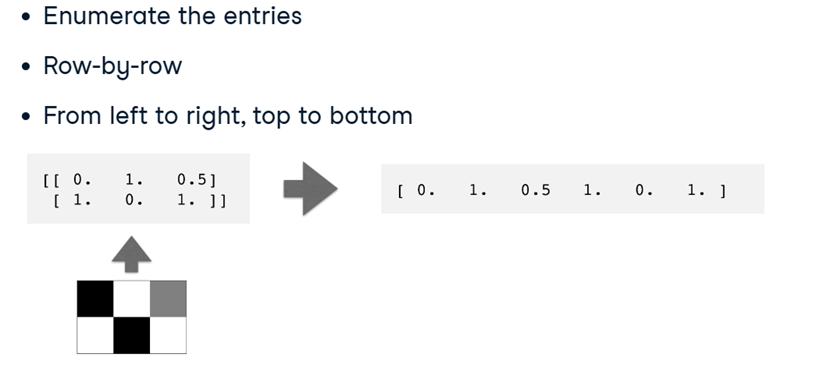
  - *Images are samples, pixels are features*
  - *each row corresponds to an image*
  - *each columns corresponds to a pixcel*

In [201]:
# apply NMF 
nmf = NMF(n_components = 10)
nmf.fit(words)
print(nmf.components_.shape)
# 10 rows, 2 dimension 
# the rows or components live in 4 dimensional space, 1 demension for each word 

(10, 4)


C:\Users\QXJ\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [206]:
img = np.array([0, 1, 0.5, 1, 0, 1])
bitmap = img.reshape((2,3))
print(bitmap)
# 2-dimensional array of pixel brightness

[[0.  1.  0.5]
 [1.  0.  1. ]]


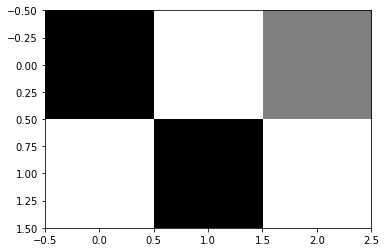

In [207]:
# print the image
plt.imshow(bitmap, cmap='gray', interpolation = 'nearest')
plt.show()

### 4.3 Building recommender systems using NMF
- Apply NMF to the word-frequency array to compare NMF feature values
- exact feature values may be different! but all versions lie on the same line through the origin. 
 > 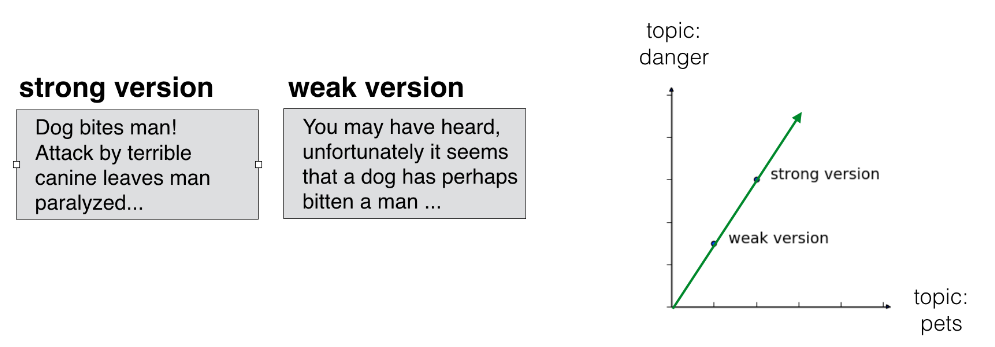
- Cosine similarity: uses the angle between the lines
 - higher values means more similar
 - max. value is 1 when angle is 0 degrees

*Recommend articles similar to article being read by cusomer* 
- Articles have similar topics

In [ ]:
# words is a word frequency array
from sklearn.decomposition import NMF
nmf = NMF(n_components = 6)
nmf_features = nmf.fit_transform(words)

In [210]:
# calculating the cosine similarities
from sklearn.preprocessing import normalize

# apply it to the NMF features
norm_features = normalize(nmf_features)
#select row corresponding to the current article
current_article = norm_features[3,:]
# pass it to the dot() method of the array of all normalized features 
similarites = norm_features.dot(current_article)

# print out the cosine results 
print(similarites)

[0.99472356 0.87971303 0.99966274 1.         0.96878555 0.76087246
 0.87971303 0.7628759  0.95239054 0.97473379 0.99458891 0.97615609]


In [ ]:
# label the similarites with the article titles
# Titles given as a list calles titles
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index = titles)

# select the normalized feature values for the current articles
current_article = df.loc['Dog bites men']
similarites = norm_features.dot(current_article)
print(similarities.nlargest())

> 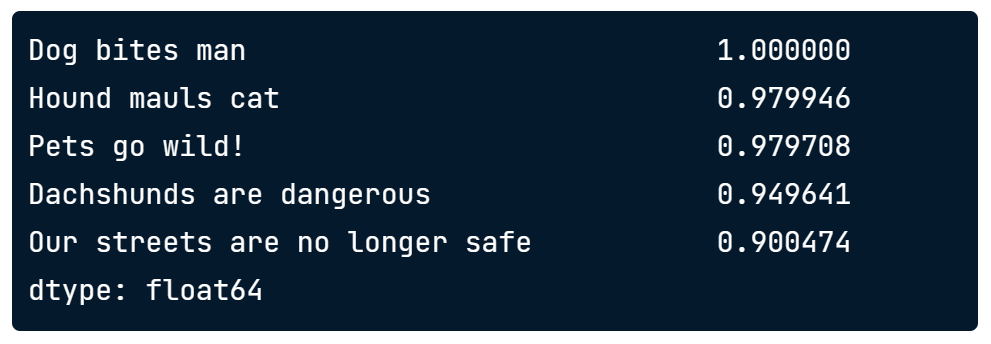